<a href="https://colab.research.google.com/github/upeast/Lee2/blob/main/week6%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1번문제

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. 데이터 로딩
data = pd.read_csv('/content/Social_Network_Ads.csv')

2번문제

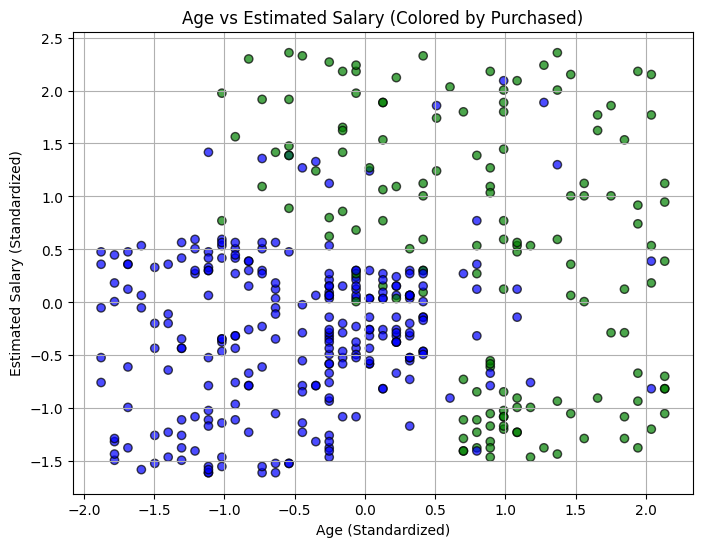

In [27]:
# 2. 데이터 전처리 및 Feature 추출
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values.reshape(-1, 1)


# 3. Feature 정규화 (표준화)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_norm = (X - X_mean) / X_std

# 4. 시각화
colors = ['blue' if label == 0 else 'green' for label in y.ravel()]

plt.figure(figsize=(8, 6))
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=colors, alpha=0.7, edgecolors='k')
plt.xlabel("Age (Standardized)")
plt.ylabel("Estimated Salary (Standardized)")
plt.title("Age vs Estimated Salary (Colored by Purchased)")
plt.grid(True)
plt.show()

3번문제

In [30]:
from sklearn.model_selection import train_test_split

# X는 정규화된 특성, y는 타겟 (Purchased)
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=42)

4번문제

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [31]:
# 손실 함수 (교차 엔트로피 오차)
def compute_cost(X, y, weights):
    m = y.shape[0]
    h = sigmoid(X @ weights)
    epsilon = 1e-5
    cost = -(1/m) * (y.T @ np.log(h + epsilon) + (1 - y).T @ np.log(1 - h + epsilon))
    return cost[0][0]

5번문제

In [32]:
def gradient_descent(X, y, alpha=0.1, epochs=1000):
    m, n = X.shape
    weights = np.zeros((n, 1))
    cost_history = []

    for _ in range(epochs):
        h = sigmoid(X @ weights)
        gradient = (1/m) * X.T @ (h - y)
        weights -= alpha * gradient
        cost_history.append(compute_cost(X, y, weights))

    return weights, cost_history

# bias 항 추가
X_train_b = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_b = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# 학습
weights, cost_history = gradient_descent(X_train_b, y_train, alpha=0.1, epochs=1000)

# 파라미터 출력
w0, w1, w2 = weights.ravel()
print(f"w0 = {w0:.4f}, w1 = {w1:.4f}, w2 = {w2:.4f}")

w0 = -1.0889, w1 = 2.1428, w2 = 1.1919


6번문제

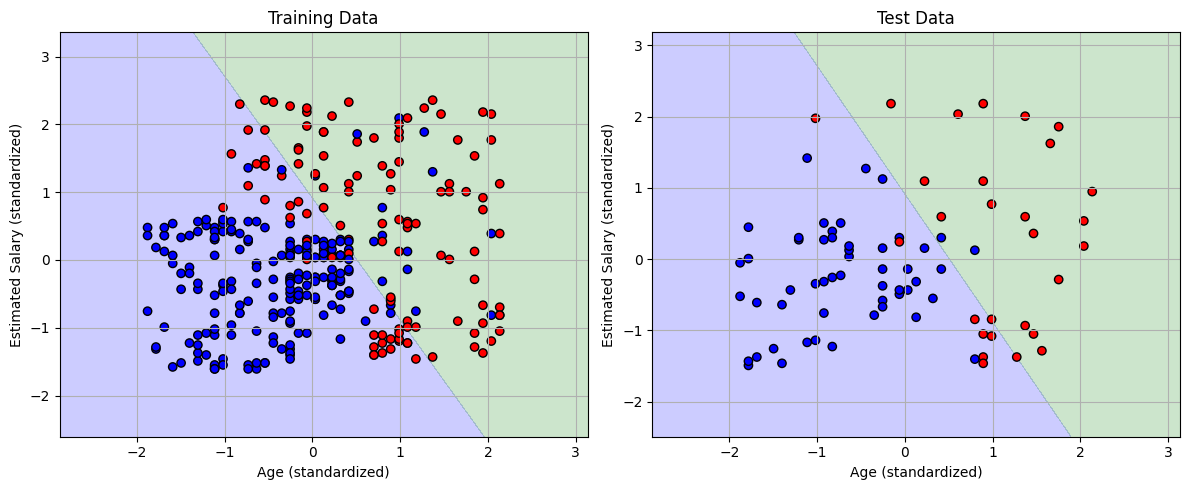

In [33]:
def plot_decision_boundary(X, y, weights, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    X_grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()]
    Z = sigmoid(X_grid @ weights).reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'green'])
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.xlabel("Age (standardized)")
    plt.ylabel("Estimated Salary (standardized)")
    plt.grid(True)

# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(X_train, y_train, weights, "Training Data")

plt.subplot(1, 2, 2)
plot_decision_boundary(X_test, y_test, weights, "Test Data")
plt.tight_layout()
plt.show()

7번

In [34]:
from sklearn.linear_model import LogisticRegression

# 모델 학습
clf = LogisticRegression()
clf.fit(X_train, y_train.ravel())

# 파라미터 출력
print(f"scikit-learn 파라미터:")
print(f"w0 = {clf.intercept_[0]:.4f}, w1 = {clf.coef_[0][0]:.4f}, w2 = {clf.coef_[0][1]:.4f}")

scikit-learn 파라미터:
w0 = -1.0529, w1 = 2.0125, w2 = 1.1232


8번 문제

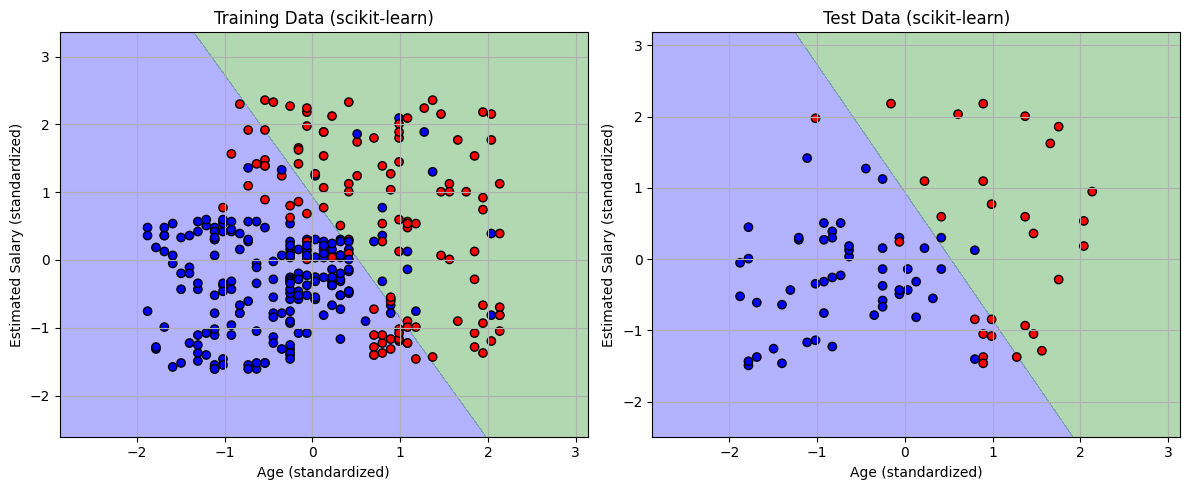

In [35]:
# 8. scikit-learn 모델 시각화
def plot_decision_boundary_sklearn(X, y, model, title):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.3, colors=['blue', 'green'])
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolor='k')
    plt.title(title)
    plt.xlabel("Age (standardized)")
    plt.ylabel("Estimated Salary (standardized)")
    plt.grid(True)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary_sklearn(X_train, y_train, clf, "Training Data (scikit-learn)")
plt.subplot(1, 2, 2)
plot_decision_boundary_sklearn(X_test, y_test, clf, "Test Data (scikit-learn)")
plt.tight_layout()
plt.show()